In [9]:
import numpy as np
from numpy.random import uniform
from matplotlib import pyplot as plt
from sklearn import neighbors
from itertools import combinations
%matplotlib inline

In [2]:
test_size = 10000
trials = 100
X_test = uniform(0, 1, size=(test_size, 20))
Y1_test= (X_test[:,0]>0.5) + np.zeros(test_size)
Y2_test = (np.sum(X_test[:,:10], axis=1)>5) + np.zeros(test_size)

In [3]:
k_means_gen_erros = {k: [] for k in [50, 40, 30, 20, 10, 7, 3, 1]}

In [4]:
for k in k_means_gen_erros:
    for t in range(trials):
        X = uniform(0, 1, size=(80, 20))
        Y1= (X[:,0]>0.5) + np.zeros(80)
        knn = neighbors.KNeighborsRegressor(k)
        predict = knn.fit(X, Y1).predict(X_test)
        k_means_gen_erros[k].append(np.mean((Y1_test - predict) ** 2))
    break

In [5]:
k_means_pred_errors = []
k_means_bias = []
k_means_variance = []

for k in sorted(k_means_gen_erros):
    tmp = np.zeros((test_size, trials))
    err = []
    for t in range(trials):
        X = uniform(0, 1, size=(80, 20))
        Y1= (X[:,0]>0.5) + np.zeros(80)
        knn = neighbors.KNeighborsRegressor(k)
        predict = knn.fit(X, Y1).predict(X_test)
        tmp[:,t] = predict
        err.append(np.mean((Y1_test - predict)**2))
    bias, variance = np.mean((np.mean(tmp, axis=1) - Y1_test)**2), np.mean(np.var(tmp, axis=1))
    k_means_pred_errors.append(np.mean(err))
    k_means_bias.append(bias)
    k_means_variance.append(variance)

(0, 0.4)

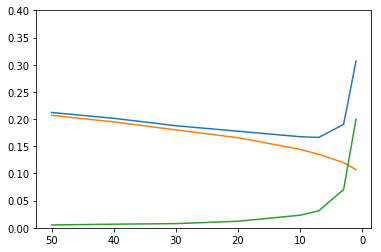

In [6]:
plt.plot(sorted(k_means_gen_erros), k_means_pred_errors)
plt.plot(sorted(k_means_gen_erros), k_means_bias)
plt.plot(sorted(k_means_gen_erros), k_means_variance)
plt.gca().invert_xaxis()
plt.ylim(0, 0.4)

In [35]:
p = 18
X_test_ = np.hstack((np.ones(shape=(X_test.shape[0], 1)), X_test))

In [36]:
lr_pred_errors = []

for t in range(trials):
    X = uniform(0, 1, size=(80, 20))
    Y2 = (np.sum(X[:,:10], axis=1)>5) + np.zeros(80)
    X = np.hstack((np.ones(shape=(80, 1)), X))

    best_combination, best_beta, min_error = None, None, np.inf
    for predictors in combinations(list(range(1, 21)), p):
        predictors = [0] + list(predictors)
        X_ = X[:,predictors]
        beta = np.linalg.inv(X_.T @ X_) @ X_.T @ Y2
        y_hat = X_ @ beta
        error = np.mean((Y2 - y_hat) ** 2)
        if error < min_error:
            best_combination = predictors
            min_error = error
            best_beta = beta
    y_hat = X_test_[:,best_combination] @ best_beta
    lr_pred_errors.append(np.mean((Y2_test - y_hat)**2))

In [37]:
np.mean(lr_pred_errors)

0.12132272780442374